# REGULARISATION

In [1]:
""" polynomial_ridge_regression.py """
import numpy as np
from numpy.linalg import norm , solve
import matplotlib.pyplot as plt
from numpy.random import rand , randn


Implements Ridge Regression, a regularised version of polynomial regression.
This model adds a penalty for large coefficient values to prevent overfitting.
    

In [ ]:
def generate_data(p, beta , sig, n):
    """ Function to create synthetic dataset based on a true polynomial relationship, plus some random noise.

    Args:
        p (int): Degree of the polynomial.
        beta (np.ndarray): Coefficients of the polynomial.
        sig (float): Standard deviation of the noise.
        n (int): Number of data points to generate.
    Returns:
        u (np.ndarray): Input feature values, uniformly distributed.
        y (np.ndarray): Output values, generated from the polynomial with added noise.
    """
    u = np.random.rand(n, 1)
    y = (u ** np.arange(0, p+1)) @ beta + sig * np.random.randn(n, 1)
    return u, y

beta = np.array([[10, -140, 400, -250]]).T
n = 100
sig = 5
u, y = generate_data(3, beta , sig, n)

def model_matrix(p, u):
   """
   Function to construct the design matrix (also called the feature matrix) X for a given polynomial order p. 
   This matrix is essential for fitting the linear model.
   """
   X = np.ones((n, 1))
   p_range = np.arange(0, p + 1)    
   for p_current in p_range:
      if p_current > 0:
         X = np.hstack((X, u**(p_current))) 
   return X
             
def ridge_train(X, y, ngamma):
    """
    Core function for training the model. 
    It calculates the optimal model coefficients (betahat) using the analytical solution for Ridge Regression.
    """
    RegM = ngamma*np.identity(p + 1)
    betahat = solve(X.T @ X + RegM, X.T @ y)
    return betahat

X, betahat = {},{}
gamma = 0.0001;
ps = [1, 3, 15]
for p in ps:
   X[p] = model_matrix(p, u) 
   betahat[p] = ridge_train(X[p], y, n*gamma)

def test_coefficients(n, betahat, X, y):
    """
    Function to evaluate the model's performance by calculating the mean squared error (MSE), 
    which is a common loss function for regression tasks.
    """
    y_hat = X @ betahat
    loss = (norm(y - y_hat)**2/n)
    return loss



PLOT

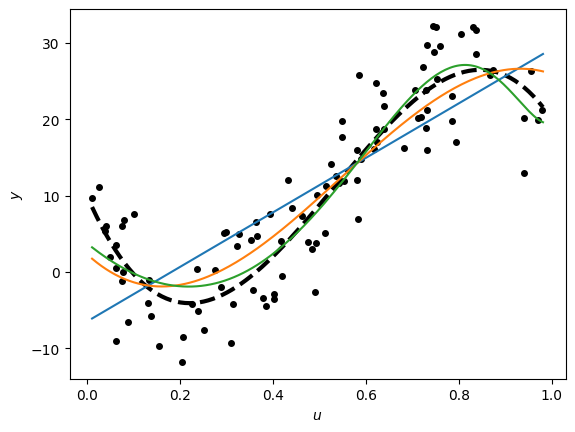

In [14]:
u_test, y_test = generate_data(3, beta, sig, n)
X_test = {}
training_loss = {}
test_loss = {}
for p in ps:
     X_test[p] = model_matrix(p, u_test)
     training_loss[p] = test_coefficients(n, betahat[p], X[p], y)
     test_loss[p] = test_coefficients(n, betahat[p], X_test[p], y_test)

#Plot the points and true line and store in the list "plots"
xx = np.arange(np.min(u), np.max(u)+5e-3, 5e-3)
yy = np.polyval(np.flip(beta), xx)
plots = [plt.plot(u, y, 'k.', markersize=8)[0], plt.plot(xx, yy, 'k--',linewidth=3)[0]]
# add the three curves
for i in ps:
    yy = np.polyval(np.flip(betahat[i]), xx)
    plots.append(plt.plot(xx, yy)[0])
plt.xlabel(r'$u$')
plt.ylabel(r'$y$')
plt.show()